In [2]:
from keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
model = load_model("./model1.h5")
path = "drive/MyDrive/fourth grade/AI in medicine/HW1/EKG_seg/train/1_json/img.png"


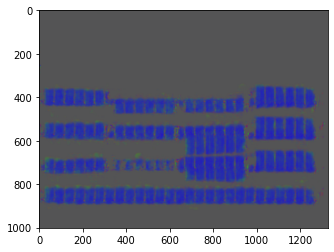

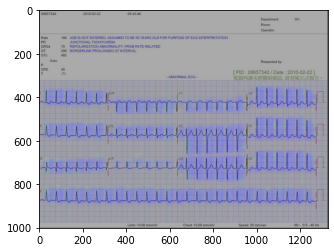

In [3]:
img = np.array(cv2.imread(path))
testimg = img.astype("float32")/255
original= testimg.shape
Resize=(512,512)

X_test_img = cv2.resize(testimg, Resize, interpolation=cv2.INTER_AREA)
X_test_img = X_test_img.reshape(-1,512,512, 3).astype("float32")
seg = model.predict(X_test_img)
seg = seg.reshape(512,512, 3)
seg= (seg*255).astype(np.uint8)
seg = cv2.resize(seg, (original[1], original[0]), interpolation=cv2.INTER_AREA)
plt.imshow(seg, cmap="binary")
plt.show()
alpha =0.5
result = cv2.addWeighted(img, alpha, seg, 1-alpha,0)
plt.imshow(result, cmap="binary")
plt.show()